# CX 4230, Spring 2016: [16] ODEs for the Post-Valentine's Day Blues

## (Sample solutions)

In the last notebook, [Lab 15](http://nbviewer.jupyter.org/github/rvuduc/cx4230-ipynbs/blob/master/15--diffusion.ipynb), you needed to solve a _linear_ system of ordinary differential equations (ODEs), meaning of the form,

$$
  \dfrac{d}{dt} \vec{y}(t) = A \cdot \vec{y}(t),
$$

where $A$ is a matrix with (constant) coefficients. Linear problems like this one are quite common in science and engineering applications. So what can we say about their solutions?

The goal of today's notebook is to help build your intuition through a lighthearted exercise, namely, modeling the "dynamics" of love! This exercise will be our gentle introduction to _dynamical systems_. The specific example follows [an exercise](http://www.jstor.org/stable/2690328) suggested originally by Steven Strogatz.

## The setup

Romeo and Juliet are looking for love and find one another. Let,

* $R(t) \equiv$ Romeo's love (positive values) or hate (negative values) for Juliet; and
* $J(t) \equiv$ Juliet's love or hate for Romeo,

where both quantities are continuous functions of (continuous) time $t$.

Initially, Romeo immediately falls in love with Juliet, whereas Juliet has no opinion. Let's model this scenario as the initial condition of $R(0) = 1$ and $J(0) = 0$.

Romeo is the type of lover who mimics his partner: the more someone loves or hates him, the more he wants to return the same feeling. Juliet, by contrast, is fickle: the more someone loves her, the more she tends to dislike that person.

Let's model the dynamics of Romeo and Juliet's love by a system of ordinary differential equations---because that's everyone's first instinct---where the derivatives of $R(t)$ and $J(t)$ depend only linearly on $R(t)$ and $J(t)$, i.e.,

$$
\begin{eqnarray}
  \begin{array}{rcl}
    \dfrac{dR(t)}{dt} & = & a_0 R(t) + b_0 J(t) \\
    \dfrac{dJ(t)}{dt} & = & c_0 R(t) + d_0 J(t)
  \end{array}
  & \qquad \implies \qquad &
  \begin{array}{rcl}
    \dfrac{d}{dt} \left(\begin{array}{c}
                    R(t) \\
                    J(t)
                  \end{array}\right)
    & = &
      \left(\begin{array}{cc}
        a_0 & b_0 \\
        c_0 & d_0
      \end{array}\right)
      \cdot
      \left(\begin{array}{c}
        R(t) \\
        J(t)
      \end{array}\right).
  \end{array}
\end{eqnarray}
$$

In general, the coefficients $a_0$, $b_0$, $c_0$, and $d_0$ could take on any values. For the specific Romeo described above, it would be reasonable to let $a_0 = 0$ and $b_0 > 0$. For Juliet, we might choose her coefficients as $c_0 < 0$ and $d_0 = 0$.

Let's solve this system numerically. Let $\vec{y}(t) = \left(\begin{array}{c} y_0(t) \\ y_1(t) \end{array}\right) \equiv \left(\begin{array}{c} R(t) \\ J(t) \end{array}\right)$. Consider the system $\dfrac{d\vec{y}}{dt} = \vec{f}(t, \vec{y})$ for a suitable choice of $\vec{f}(\cdot, \cdot)$ corresponding to the "Romeo and Juliet" system.

In [1]:
# Our usual multidimensional array tools
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.integrate import odeint

In [2]:
# Core plotting support
import matplotlib.pyplot as plt
%matplotlib inline

**Exercise.** Write a function to compute $\vec{f}(t, \vec{y})$ for the Romeo and Juliet system. Then run the simulation code below. Do Romeo and Juliet find true love?

In [3]:
def f_rj (y, t, a0, b0, c0, d0):
    # @YOUSE: Complete this function
    #assert (False)
    r_t, j_t = y[0], y[1]
    return np.array ([a0*r_t + b0*j_t,
                      c0*r_t + d0*j_t])

A =
 [[ 0.  1.]
 [-1.  0.]]
eig (A) =
 [ 0.+1.j  0.-1.j]


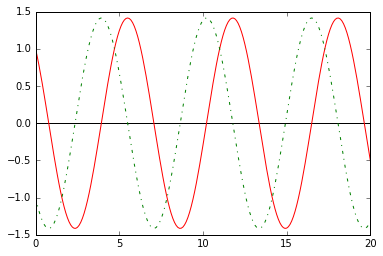

In [4]:
def isim (r0=1.0, j0=-1.0, a0=0.0, b0=1.0, c0=-1.0, d0=0.0, t_max=20.0):
    """
    Simulates the Romeo & Juliet system for the given input parameters.
    `t_max` is the simulation ending time (default: 20 time units).
    """
    T = np.linspace (0, t_max, t_max*10+1)
    Y0 = np.array ([r0, j0])
    y = odeint (f_rj, Y0, T, args=(a0, b0, c0, d0))
    
    # Results
    r, j = y[:, 0], y[:, 1]
    y_equals_zero = np.zeros (T.shape)
    plt.plot (T, y_equals_zero, 'k-',
              T, r, 'r-',
              T, j, 'g-.')
    
    # Analysis
    A = np.array ([[a0, b0],
                   [c0, d0]])
    print ("A =\n", A)
    print ("eig (A) =\n", np.linalg.eigvals (A))

# Test case
isim (r0=1.0, j0=-1.0, a0=0.0, b0=1.0, c0=-1.0, d0=0.0)

**Exercise.** Suppose our couple exhibits the following behavior.

1. Romeo is an _eager beaver_, meaning he gets excited _both_ by his partner's feelings of love _and_ by his own affectionate feelings. This case might be modeled as $a_0 > 0$ _and_ $b_0 > 0$.
2. Juliet is _cautiously self-aware_, meaning she resists Romeo's positive feelings but embraces her own positive feelings. This case might be modeled as $c_0 < 0$ and $d_0 > 0$.

Can an eager beaver and cautiously self-aware lover find romance?

A =
 [[ 1.  1.]
 [-1.  1.]]
eig (A) =
 [ 1.+1.j  1.-1.j]


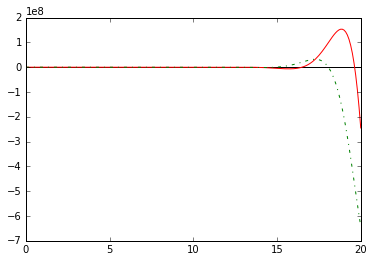

In [5]:
# @YOUSE: Set the parameters and see what happens.
#isim (r0=1.0, j0=-1.0, a0=0.0, b0=1.0, c0=-1.0, d0=0.0, t_max=20)
isim (r0=1.0, j0=-1.0, a0=1.0, b0=1.0, c0=-1.0, d0=1.0, t_max=20)

**Exercise.** Come up with your own Romeo and Juliet scenario, by picking some initial conditions and values for the coefficients. Submit your choice, including a description of your scenario, here: http://j.mp/gtloveshack. We'll offer a prize for the most entertaining submission.

A =
 [[ 0.  1.]
 [-1.  0.]]
eig (A) =
 [ 0.+1.j  0.-1.j]


<function __main__.isim>

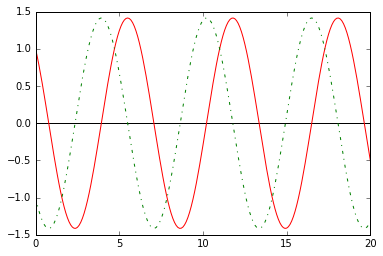

In [6]:
from ipywidgets import interact

interact (isim
          , r0=(-1.0, 1.0, 0.1)
          , j0=(-1.0, 1.0, 0.1)
          , a0=(-1.0, 1.0, 0.1)
          , b0=(-1.0, 1.0, 0.1)
          , c0=(-1.0, 1.0, 0.1)
          , d0=(-1.0, 1.0, 0.1)
          , t_max=(0.0, 100.0, 1.0)
         )

## Bonus material: Solving a complex system!

Last year, a very curious team of students asked what would happen if the coefficients were themselves imaginary! For instance, let

$$
\begin{eqnarray}
  \left(\begin{array}{cc}
    a_0 & b_0 \\
    c_0 & d_0
  \end{array}\right)
  & = &
  \left(\begin{array}{cc}
    i & 2.0 \\
    -0.5 & 0.0
  \end{array}\right),
\end{eqnarray}
$$

where $a_0$ is the pure imaginary value of $i=\sqrt{-1}$. The team from Spring 2015 who came up with these coefficients described the system thusly:

> "This [system] describes how Romeo and Juliet fictionalize the world and have feelings that are partly based in the real world and partly in the imaginary. This creates the oscillary effects of the fictional vs. real relationship, which we think better models how actual people perceive reality."

It's true, love can be delusional -- this team is on to something!

> See the [`ode()` documentation](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.ode.html).

In [7]:
from scipy.integrate import ode, complex_ode

def f_rj_complex (t, y, a0, b0, c0, d0):
    r_t, j_t = y[0], y[1]
    return np.array ([a0*r_t + b0*j_t,
                      c0*r_t + d0*j_t], dtype=complex)

def sim_complex (r0=1.0, j0=-1.0, a0=0.0, b0=1.0, c0=-1.0, d0=0.0, t_max=20.0):
    """
    Simulates the Romeo & Juliet system for the given input parameters.
    `t_max` is the simulation ending time (default: 20 time units).
    """
    # Create ODE context for a complex-valued system
    solver = ode (f_rj_complex).set_integrator ('zvode', method='bdf', with_jacobian=False)
    solver.set_f_params (a0, b0, c0, d0)
    
    # Set integration time points and initial conditions
    t = np.linspace (0, t_max, t_max*10+1)
    solver.set_initial_value ([r0, j0], t[0])
        
    # Run the solver
    y = np.zeros ((len (t), 2), dtype=complex)
    y[0, :] = np.array ([r0, j0], dtype=complex)
    k = 1
    while solver.successful () and k < len (t):
        solver.integrate (t[k])
        y[k, :] = solver.y
        k = k + 1
    
    # Analysis
    A = np.array ([[a0, b0],
                   [c0, d0]])
    print ("A =\n", A)
    print ("eig (A) =\n", np.linalg.eigvals (A))
    
    return (y, t, A)

# Test case
(y, t, A) = sim_complex (r0=1.0, j0=-1.0, a0=1.j, b0=2.0, c0=-0.5, d0=0.0)

A =
 [[ 0.0+1.j  2.0+0.j]
 [-0.5+0.j  0.0+0.j]]
eig (A) =
 [  0.00000000e+00+1.61803399j   1.38777878e-17-0.61803399j]


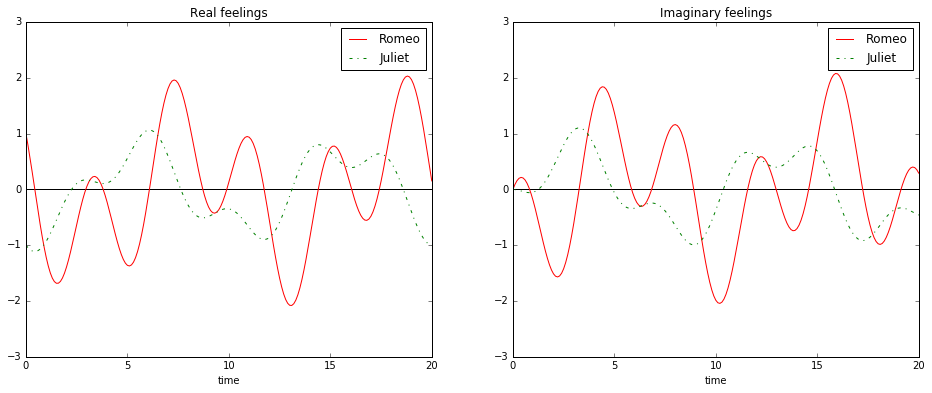

In [8]:
# Plot
r, j = y[:, 0], y[:, 1]
y_equals_zero = np.zeros (t.shape)
fig = plt.figure (figsize=(16, 6))
    
ax_real = fig.add_subplot (1, 2, 1)
ax_real.plot (t, y_equals_zero, 'k-', label='')
ax_real.plot (t, r.real, 'r-', label='Romeo')
ax_real.plot (t, j.real, 'g-.', label='Juliet')
ax_real.legend ()
ax_real.set_xlabel ('time')
ax_real.set_title ('Real feelings')

ax_imag = fig.add_subplot (1, 2, 2)
ax_imag.plot (t, y_equals_zero, 'k-', label='')
ax_imag.plot (t, r.imag, 'r-', label='Romeo')
ax_imag.plot (t, j.imag, 'g-.', label='Juliet')
ax_imag.legend ()
ax_imag.set_xlabel ('time')
ax_imag.set_title ('Imaginary feelings')

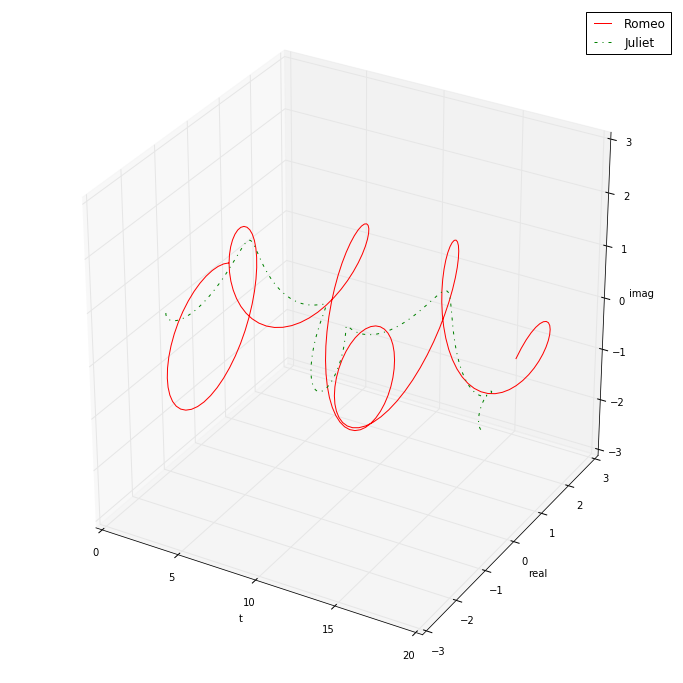

In [9]:
# http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure (figsize=(12, 12))
ax = fig.add_subplot (111, projection='3d')
ax.plot (t, y[:, 0].real, y[:, 0].imag, 'r', label='Romeo')
ax.plot (t, y[:, 1].real, y[:, 1].imag, 'g-.', label='Juliet')
ax.legend ()
ax.set_xlabel ('t')
ax.set_ylabel ('real')
ax.set_zlabel ('imag')